<a href="https://colab.research.google.com/github/MiningTheSkies/csm_research_group_documentation/blob/master/Copy_of_GPGN_598B_HW1_Numerical_Modeling_Finite_Difference_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[//]: # (This is the HTML/CSS header block ... put all commands in here)
<style type="text/css">
<!--
 .tab { margin-left: 40px; }
 P { text-align:center }
-->
</style>

```
Course: GPGN 598B - Full Waveform Modelling Across Scales
Date: Feb. 2, 2020
```
# Homework: Numerical Modeling - Problem Set 1
---

## Finite Difference Method

The finite difference approximation of derivatives may be obtained by Taylor's expansion. The following is what you need in order to solve this problem set.

> $\partial_tT(x,t) \approx \frac{T(x,t+\Delta t)-T(x,t)}{\Delta t}$ <br></br>
> $\partial^2_xT(x,t) \approx \frac{T(x+\Delta x,t)-2T(x,t)+T(x-\Delta x,t)}{\Delta x^2}$

## 1) Heat Equation
---

The 1-D expression of the conservation of heat energy writes as:

> $p(x)\: c_p(x) \: \partial_tT(x,t)=-\partial_xq(x,t), \;\;\;\; x\in[0,L], \;\;\; t\in[0,+\infty),$

where $T(x,t)$ is the temperature field at the position $x$ at the instant $t$, $p(x)$ is the density, $c_p(x)$ is the specific heat at constant pressure, and $q(x,t)$ is the heat flux. The heat flux is related to the temperature through the Fourier's law of heat conduction:

> $q(x,t) = -k(x) \; \partial_x T(x,t)$,

where $k(x)$ is the thermal conductivity. The Fourier's law expresses the fact that the flow rate of heat energy is driven by the negative gradient of temperature across a surface.

The heat equation can thus be expressed as:

> $p(x)\; c_p(x)\; \partial_tT(x,t)=\partial_x[k(x)\; \partial_xT(x,t)]$.

If we further assume contant thermal properties, this equation rewrites as:

> $\partial_tT(x,t)=D\; \partial^2_xT(x,t)$,

When we have introduced $D\equiv \frac{k}{(pc_p)}$, the thermal diffusivity.

Use the finite difference approximation given above to solve the 1-D heat flow equation. You are strongly encouraged to write your code without the constant thermal properties assumption, keeping it general and allowing for heterogeneous material properties.

Consider a string of length $L=100$ with a spike of termperatures at $x=50$. The initial conditions are

> $T(x,0)=0 \;\;\;\; (x\neq50)$ <br></br>
> $T(x,0)=1 \;\;\;\; (x=50)$

The boundary condiions are:

> $T(0,t)\,=0 \;\;\;\; (t\in[0,+\infty))$ <br></br>
> $T(L,t)=0 \;\;\;\; (t\in[0,+\infty))$

The grid size defined by $\Delta x=\frac{L}{N-1}$, where $N$ is the number of nodes in the x-direction. In this problem, $\Delta x$ is chosen to be $1$. Plot the temperature field at different times, and experiment with four different time steps $\Delta t$:

$$
  \Delta t=0.4 \frac{\Delta x^2}{D},\;\;\;\;
  \Delta t=0.45 \frac{\Delta x^2}{D},\;\;\;\;
  \Delta t=0.55 \frac{\Delta x^2}{D},\;\;\;\;
  \Delta t=0.6 \frac{\Delta x^2}{D},\;\;\;\;
$$

## Answer for Part 1
---


In [ ]:
# ----- Import Libraries -----

import numpy as np
import itertools
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scipy
import scipy.linalg
from scipy.linalg import lu_factor, lu_solve

In [ ]:
# ----- Define the environment -----

D = 1                           # constant - define the thermal diffusivity
L = 100                         # space - total length of object
N = 101                         # space - total distance nodes
x = np.linspace(0, L, N)        # space - defines the mesh
dx = L/(N-1)                    # space - change in distance between each node

t = np.linspace(0, L, N)                            # time - defines the mesh
dt_options = np.array([0.4, 0.45, 0.55, 0.6])       # time - the various timestep choices available
dt = dt_options * dx**2 / D                         # time - defines an array of timesteps

# F = D*dt/dx**2                # constant - define the mesh Fourier number

T0 = 0                          # temp - initial temperature
T_L = T_R = 0                   # temp - (L)eft and (R)ight boundary temperatures
T_spike = 1                     # temp - initial temperature spike
T_cur = np.zeros(N)             # temp - temperature at the current time (already calculated)
T_new = np.zeros(N)             # temp - temperature at the next time (to be calculated)

# initialize mesh temperature with temperature spike at the 1/2 way place (in this case, 50)
T_cur[:50] = T_cur[51:] = T0
T_cur[50] = T_spike

solution_space      = np.zeros((len(dt),N,N))       # initialize the solution space (which will hold all values for all time iterations)
solution_space[:,:,0] = T_cur                       # apply the initial temperatures to the solution space at t=0 for the first dt option (dt=0.4)

for q in range(len(dt)):
    for i in range(1, N):
        for j in range(1, N-1):
            T_new[j]  = D * (dt[q] / dx**2) * (T_cur[j-1] - 2*T_cur[j] +  T_cur[j+1]) + T_cur[j]
        
        T_new[0], T_new[-1]     = T_L, T_R
        T_cur[:]                = T_new
        solution_space[q,:,i]   = T_new
    
    T_cur[:50] = T_cur[51:] = T0
    T_cur[50] = T_spike
    T_new = np.zeros(N)
    q += 1

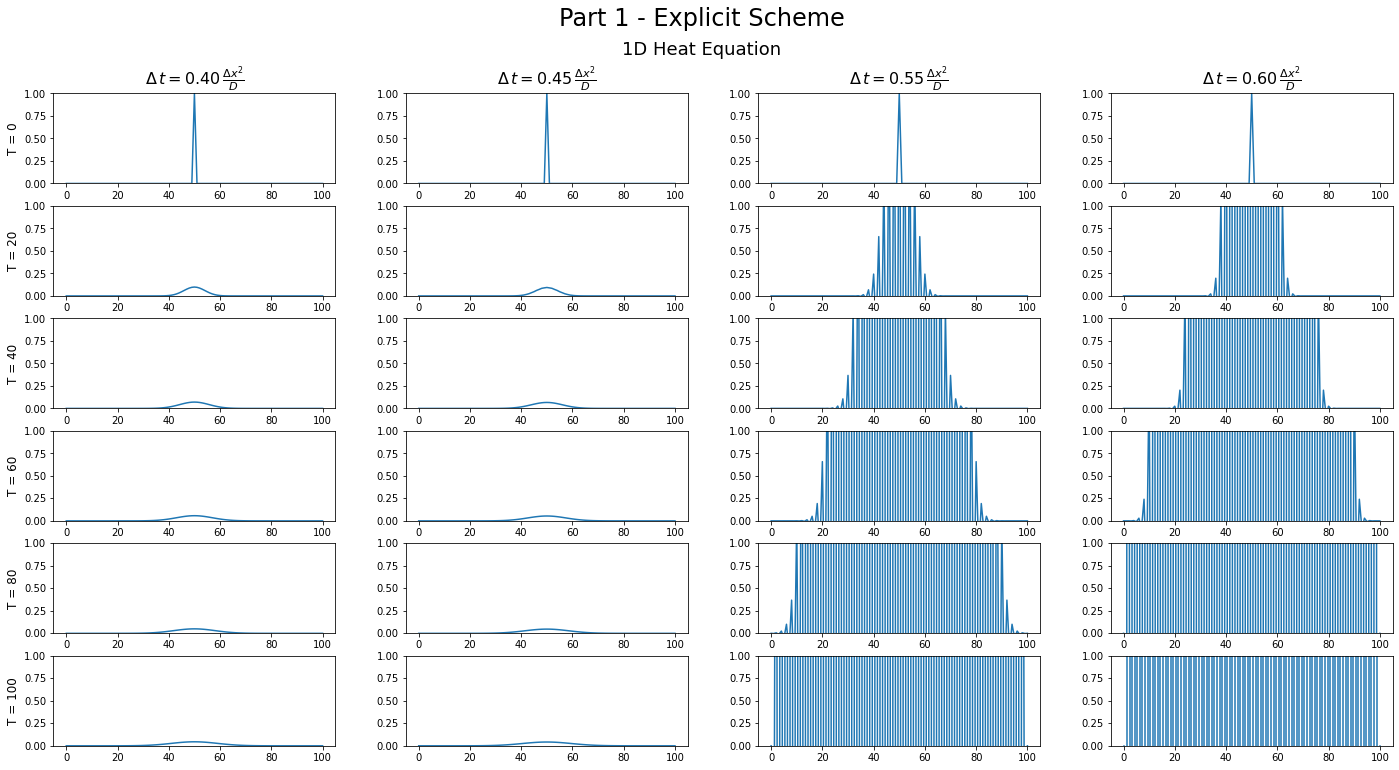

In [ ]:
rows, cols = 6, len(dt)
fig = plt.figure(figsize=(24,12))#, sharex=True, sharey=True)
spec = fig.add_gridspec(nrows=rows, ncols=cols, wspace=.25, hspace=.25)
plt.suptitle('Part 1 - Explicit Scheme', fontsize=24, x=.5)
fig.text(.5,.925,'1D Heat Equation', fontsize=18, ha='center')

for row in range(rows):
    for col in range(cols):
        ax = fig.add_subplot(spec[row,col])
        ax.plot(solution_space[col,:,row*20])
        plt.ylim(T0,T_spike)
        # plt.legend(['T = %d' % (row*20)])
        if col == 0:
            plt.ylabel('T = {}'.format(row*20), fontsize=12)
        if row == 0:
            ax.set_title(r'$\Delta \, t = %.2f \, \frac{\Delta x^2}{D}$' % (dt[col]), fontsize=16)

# for ax in fig.get_axes():
#     ax.label_outer()
plt.show()

## 2) Extra Question 1 - Explicit versus Implicit Scheme
---

The finite difference approximation $\partial_tT(x,t)\approx \frac{T(x,\,t+\Delta t)-T(x,\,t)}{\Delta t}$ we used above is named _forward_ finite difference. The corresponding algorithm is an 'Explicit Scheme', since it's straight-forward for time marching, i.e. from $T^n=T(x,t)$ to $T^{n+1}=T(x,t+\Delta t)$.

In contrast, $\partial_tT(x,t)\approx \frac{T(x,\,t)-T(x\,t-\Delta t)}{\Delta t}$ is called a _backward_ finite difference, and the algorithm is referred to as an 'Implicit Scheme', where a set of equations have to be solved in order to march from $T^{n-1}=T(x,t-\Delta t)$ to $T^n=T(x,t)$.

Write the heat equation using a backward time scheme and a centered space discretization, and show that you end up with a matricial expression of the form:
$$
\begin{bmatrix}
    b_1 && c_1 && 0   && 0       && 0       && 0 \\
    a_2 && b_2 && c_2 && 0       && 0       && 0 \\
    0   && a_3 && b_3 && c_3     && 0       && 0 \\
    0   && 0   && ... && ...     && ...     && 0 \\
    0   && 0   && 0   && a_{N-1} && b_{N-1} && c_{N-1} \\
    0   && 0   && 0   && 0       && a_N     && b_N
\end{bmatrix}
\begin{bmatrix}
    T_1^n \\ T_2^n \\ T_3^n \\ ... \\ T_{N-1}^n \\ T_N^n
\end{bmatrix}=
\begin{bmatrix}
    d_1    && 0      && 0      && 0   && 0       && 0   \\
    0      && d_2    && 0      && 0   && 0       && 0   \\
    0      && 0      && d_3    && 0   && 0       && 0   \\
    0      && 0      && 0      && ... && 0       && 0   \\
    0      && 0      && 0      && 0   && d_{N-1} && 0   \\
    0      && 0      && 0      && 0   && 0       && d_N
\end{bmatrix}
\begin{bmatrix}
    T_1^{n-1} \\ T_2^{n-1} \\ T_3^{n-1} \\ \dots \\ T_{N-1}^{n-1} \\ T_N^{n-1}
\end{bmatrix}
$$

Identify the coefficients $a_i$, $b_i$, $c_i$, and $d_i$, for $i=1,...,N$. Notice that the inversion of a matrix $A$ can be expensive. One way to solve the problem is to recognize that this system can be efficiently solved using $LU$ factorization. Thus, $Av=d$ is equivalent to $(LU)v=d$ or $L(Uv)=d$, so we solve $Lw=d$ & $Uu=w$.

Implement the heat equation using the implicit scheme. Plot the temperature field evolution for the same $\Delta t$ used previously and compare the results.

In [ ]:
# ----- Define the environment -----

D = 1                           # constant - define the thermal diffusivity
L = 100                         # space - total length of object
N = 101                         # space - total distance nodes
x = np.linspace(0, L, N)        # space - defines the mesh
dx = L/(N-1)                    # space - change in distance between each node

t = np.linspace(0, L, N)                            # time - defines the mesh
dt_options = np.array([0.4, 0.45, 0.55, 0.6])       # time - the various timestep choices available
dt = dt_options * dx**2 / D                         # time - defines an array of timesteps

# F = D*dt/dx**2                # constant - define the mesh Fourier number

T0 = 0                          # temp - initial temperature
T_L = T_R = 0                   # temp - (L)eft and (R)ight boundary temperatures
T_spike = 1                     # temp - initial temperature spike
T_cur = np.zeros(N)             # temp - temperature at the current time (already calculated)
T_new = np.zeros(N)             # temp - temperature at the next time (to be calculated)

# initialize mesh temperature with temperature spike at the 1/2 way place (in this case, 50)
T_cur[:50] = T_cur[51:] = T0
T_cur[50] = T_spike

# initialize a 2D matrix to handle the matricial form (this could also be initialized inside the 'for' loop to keep it all together, but is unnecessary and simply adds compute)
M = np.zeros((N,N))

solution_space2      = np.zeros((len(dt),N,N))      # initialize the solution space (which will hold all values for all time iterations)
solution_space2[:,:,0] = T_cur                      # apply the initial temperatures to the solution space at t=0 for the first dt option (dt=0.4)


for q in range(len(dt)):                                # loop through the various dt options

    for i in range(1, N):                               # define the banded matrix - this must be recreated for each value of dt (hence inside the 'for' loop)
        M[i-1, i  ] =      -(D * dt[q] / dx**2)
        M[i  , i  ] = 1 + 2*(D * dt[q] / dx**2)
        M[i  , i-1] =      -(D * dt[q] / dx**2)
    M[0,0], M[-1,-1] = T_L, T_R                         # set the boundrary conditions

    for i in range(1, N):                               # this loops through time (no further loop is needed for the 'space' dimension since the scipy libary takes care of it)
        lu, piv = lu_factor(M)                          # perform LU factorization where 'lu' is an (N,N) ndarray and piv is an (N) ndarray (see scipy docs)
        T_new = lu_solve((lu, piv), T_cur)              # return the solution to the LU system (e.g. return 'x' where 'a''x' = 'b' given the lu factorization of 'a') (see scipy docs)
        
        T_new[0], T_new[-1]     = T_L, T_R              # set boundary condition for T_new
        T_cur[:]                = T_new                 # set T_cur to T_new
        solution_space2[q,:,i]   = T_new                # add to the solution space
    
    T_cur[:50] = T_cur[51:] = T0                        # reset T_cur to base case for the new dt
    T_cur[50] = T_spike                                 # reinitialize the heat spike for the new dt
    T_new = np.zeros(N)                                 # reset T_new  to base case for the new dt
    q += 1                                              # increment dt

In [ ]:
# proving to myself that the backwards schemes truly were giving difference answers (the graphs were almost too stable to easily determine if it was the same graph)
# num2 = 5
# num3 = 0
# dif32 = solution_space2[3,:num2,num3]-solution_space2[2,:num2,num3]
# dif21 = solution_space2[2,:num2,num3]-solution_space2[1,:num2,num3]
# dif10 = solution_space2[1,:num2,num3]-solution_space2[0,:num2,num3]
# dif3221 = dif32 - dif21
# dif2110 = dif21 - dif10
# print(dif32,"\n\n", dif21,"\n\n", dif10,"\n\n", dif3221,"\n\n", dif2110)

In [ ]:
# print(M,"\n")
# print(lu,"\n")
# print(piv,"\n")
# print(T_new)

In [ ]:
# ----- Showing how LU factorization and LU solving works using stock arrays ----- ... feel free to ignore, this was for my own learning

m1 = np.array([[2,5,8,7], [5,2,2,8], [7,5,6,6], [5,4,4,8]])
lu, piv = lu_factor(m1)
m2 = np.array([1,1,1,1])
m3 = lu_solve((lu, piv), m2)

print(m1,"\n")
print(lu,"\n")
print(piv,"\n")
print(lu_factor(m1),"\n")
print(m3)

[[2 5 8 7]
 [5 2 2 8]
 [7 5 6 6]
 [5 4 4 8]] 

[[ 7.          5.          6.          6.        ]
 [ 0.28571429  3.57142857  6.28571429  5.28571429]
 [ 0.71428571  0.12       -1.04        3.08      ]
 [ 0.71428571 -0.44       -0.46153846  7.46153846]] 

[2 2 3 3] 

(array([[ 7.        ,  5.        ,  6.        ,  6.        ],
       [ 0.28571429,  3.57142857,  6.28571429,  5.28571429],
       [ 0.71428571,  0.12      , -1.04      ,  3.08      ],
       [ 0.71428571, -0.44      , -0.46153846,  7.46153846]]), array([2, 2, 3, 3], dtype=int32)) 

[ 0.05154639 -0.08247423  0.08247423  0.09278351]


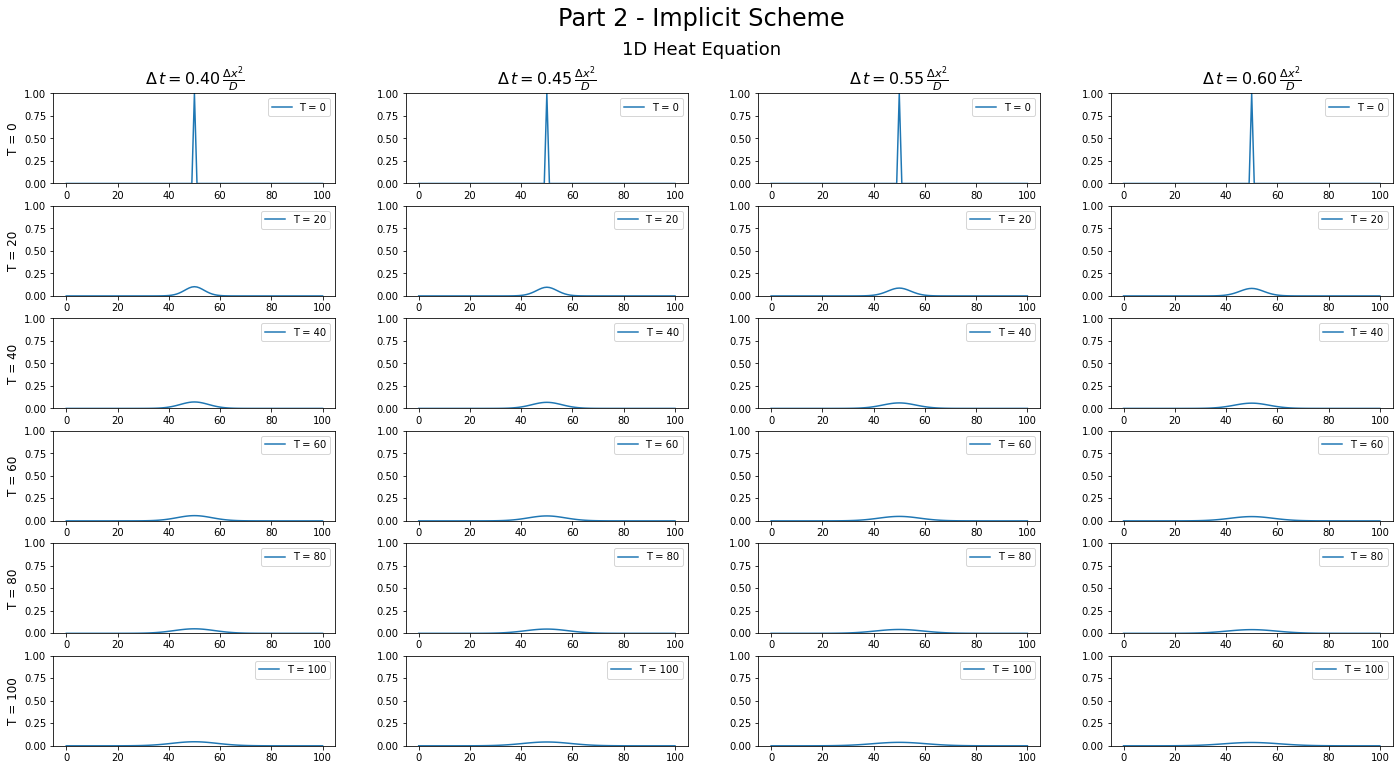

In [ ]:
rows, cols = 6, len(dt)
fig = plt.figure(figsize=(24,12))#, sharex=True, sharey=True)
spec = fig.add_gridspec(nrows=rows, ncols=cols, wspace=.25, hspace=.25)
plt.suptitle('Part 2 - Implicit Scheme', fontsize=24, x=.5)
fig.text(.5,.925,'1D Heat Equation', fontsize=18, ha='center')

for row in range(rows):
    for col in range(cols):
        ax = fig.add_subplot(spec[row,col])
        ax.plot(solution_space2[col,:,row*20])
        plt.ylim(T0,T_spike)
        plt.legend(['T = %d' % (row*20)])
        if col == 0:
            plt.ylabel('T = {}'.format(row*20), fontsize=12)
        if row == 0:
            ax.set_title(r'$\Delta \, t = %.2f \, \frac{\Delta x^2}{D}$' % (dt[col]), fontsize=16)

# for ax in fig.get_axes():
#     ax.label_outer()
plt.show()

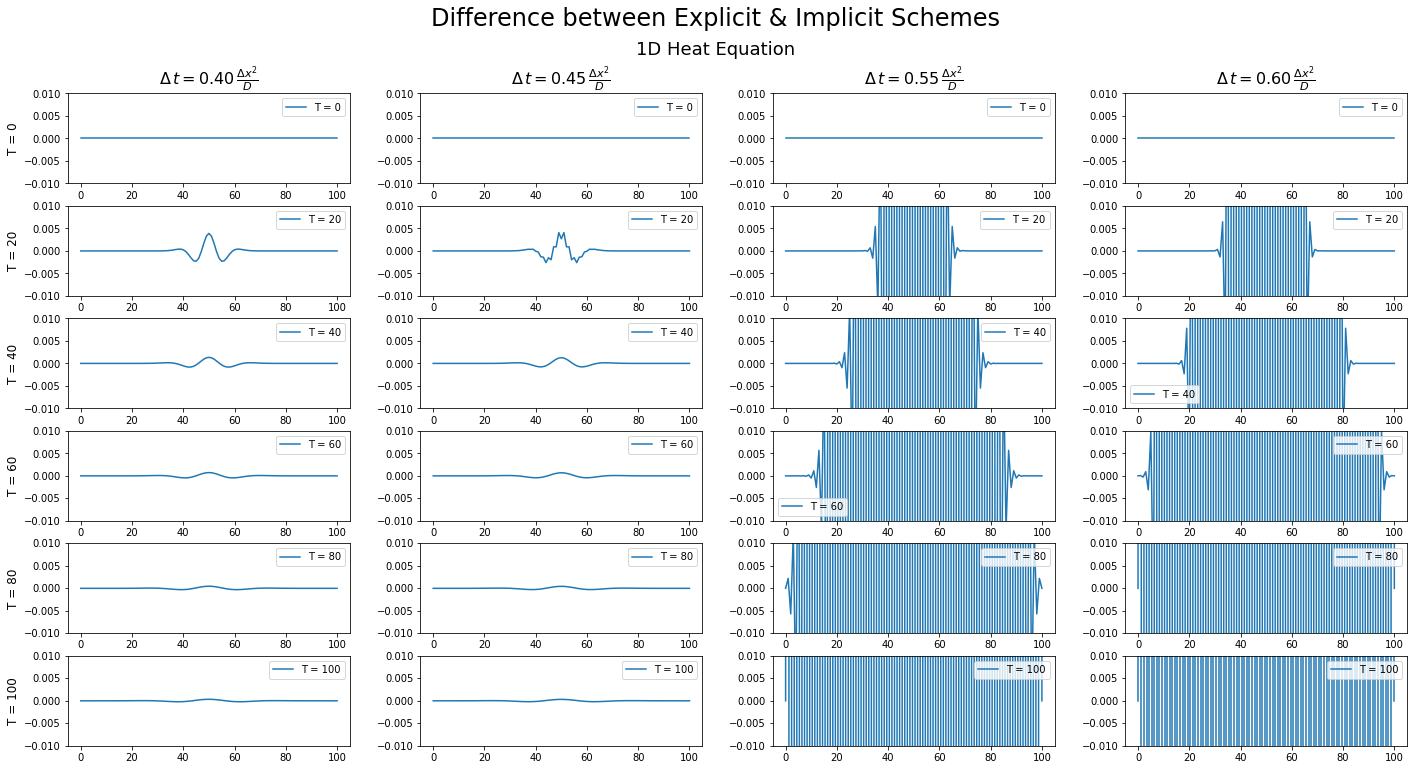

In [ ]:
rows, cols = 6, len(dt)
fig = plt.figure(figsize=(24,12))#, sharex=True, sharey=True)
spec = fig.add_gridspec(nrows=rows, ncols=cols, wspace=.25, hspace=.25)
plt.suptitle('Difference between Explicit & Implicit Schemes', fontsize=24, x=.5)
fig.text(.5,.925,'1D Heat Equation', fontsize=18, ha='center')

for row in range(rows):
    for col in range(cols):
        ax = fig.add_subplot(spec[row,col])
        ax.plot(solution_space2[col,:,row*20]-solution_space[col,:,row*20])
        plt.ylim(-.01,.01)
        plt.legend(['T = %d' % (row*20)])
        if col == 0:
            plt.ylabel('T = {}'.format(row*20), fontsize=12)
        if row == 0:
            ax.set_title(r'$\Delta \, t = %.2f \, \frac{\Delta x^2}{D}$' % (dt[col]), fontsize=16)

# for ax in fig.get_axes():
#     ax.label_outer()
plt.show()

## 3) Extra Question 2 - Crank-Nicholson Scheme

Thus far, we have seen forward & backward time schemes, which are both first-order accurate in time. If accuracy is important, one uses a Crank-Nicolson scheme, which relies on a backward time difference and an average of the central space difference scheme applied to the current and the previous time step.

The Crank-Nicolson scheme, depending on the previous time step like the backward scheme, belongs to the category of implicit time scheme. But contrary to the backward scheme, it offeres a second-order accuracy in time.

Write the heat equation using a Crank-Nicolson scheme. Show the corresponding matricial form.

In [ ]:
# ----- Define the environment -----

D = 1                           # constant - define the thermal diffusivity
L = 100                         # space - total length of object
N = 101                         # space - total distance nodes
x = np.linspace(0, L, N)        # space - defines the mesh
dx = L/(N-1)                    # space - change in distance between each node

t = np.linspace(0, L, N)                            # time - defines the mesh
dt_options = np.array([0.4, 0.45, 0.55, 0.6])       # time - the various timestep choices available
dt = dt_options * dx**2 / D                         # time - defines an array of timesteps

# F = D*dt/dx**2                # constant - define the mesh Fourier number

T0 = 0                          # temp - initial temperature
T_L = T_R = 0                   # temp - (L)eft and (R)ight boundary temperatures
T_spike = 1                     # temp - initial temperature spike
T_cur = np.zeros(N)             # temp - temperature at the current time (already calculated)
T_new = np.zeros(N)             # temp - temperature at the next time (to be calculated)

# initialize mesh temperature with temperature spike at the 1/2 way place (in this case, 50)
T_cur[:50] = T_cur[51:] = T0
T_cur[50] = T_spike

# initialize a 2D matrix to handle the matricial form (this could also be initialized inside the 'for' loop to keep it all together, but is unnecessary and simply adds compute)
M = np.zeros((N,N))
W = np.zeros((N,N))

solution_space3        = np.zeros((len(dt),N,N))    # initialize the solution space (which will hold all values for all time iterations)
solution_space3[:,:,0] = T_cur                      # apply the initial temperatures to the solution space at t=0 for the first dt option (dt=0.4)


for q in range(len(dt)):                                # loop through the various dt options

    T_temp = np.zeros(N)
    F = D * dt[q] / dx**2 / 2                           # Define the mesh Fourier number (add a division by 2 since it will be needed anyways) - this basically takes the place of dt

    for i in range(1, N):                               # define the banded matrix - this must be recreated for each value of dt (hence inside the 'for' loop)
        M[i-1, i  ] = -F
        M[i  , i  ] = 1 + F*2
        M[i  , i-1] = -F
        W[i-1, i  ] = F
        W[i  , i  ] = 1 - F*2
        W[i  , i-1] = F
    M[0,0], M[-1,-1] = T_L, T_R                         # set the boundrary conditions
    W[0,0], W[-1,-1] = T_L, T_R                         # set the boundrary conditions

    for i in range(N):                                  # this loops through time (no further loop is needed for the 'space' dimension since the scipy libary takes care of it)
        
        E = W.dot(T_cur)
        E[0], E[-1] = T_L, T_R
        T_new = W.dot(np.linalg.solve(M,E))
        if i == 0:
            solution_space3[q,:,i] = T_cur
        else:
            solution_space3[q,:,i] = T_new

        T_new[0], T_new[-1]     = T_L, T_R              # set boundary condition for T_new
        T_cur[:]                = T_new                 # set T_cur to T_new
    
    T_cur[:50] = T_cur[51:] = T0                        # reset T_cur to base case for the new dt
    T_cur[50] = T_spike                                 # reinitialize the heat spike for the new dt
    T_new = np.zeros(N)                                 # reset T_new to base case for the new dt
    q += 1                                              # increment dt

In [ ]:
print(dt)

[0.4  0.45 0.55 0.6 ]


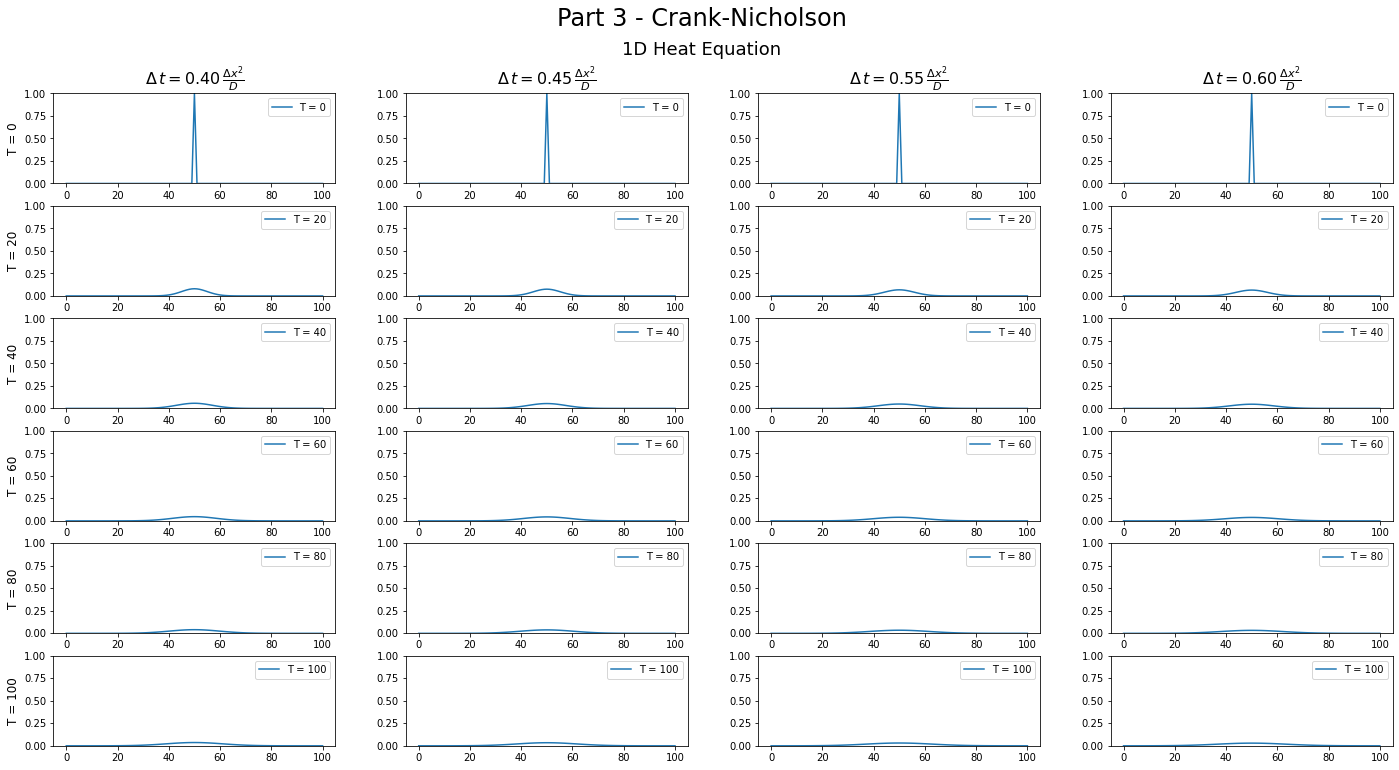

In [ ]:
rows, cols = 6, len(dt)
fig = plt.figure(figsize=(24,12))#, sharex=True, sharey=True)
spec = fig.add_gridspec(nrows=rows, ncols=cols, wspace=.25, hspace=.25)
plt.suptitle('Part 3 - Crank-Nicholson', fontsize=24, x=.5)
fig.text(.5,.925,'1D Heat Equation', fontsize=18, ha='center')

for row in range(rows):
    for col in range(cols):
        ax = fig.add_subplot(spec[row,col])
        ax.plot(solution_space3[col,:,row*20])
        plt.ylim(T0,T_spike)
        plt.legend(['T = %d' % (row*20)])
        if col == 0:
            plt.ylabel('T = {}'.format(row*20), fontsize=12)
        if row == 0:
            ax.set_title(r'$\Delta \, t = %.2f \, \frac{\Delta x^2}{D}$' % (dt[col]), fontsize=16)

# for ax in fig.get_axes():
#     ax.label_outer()
plt.show()

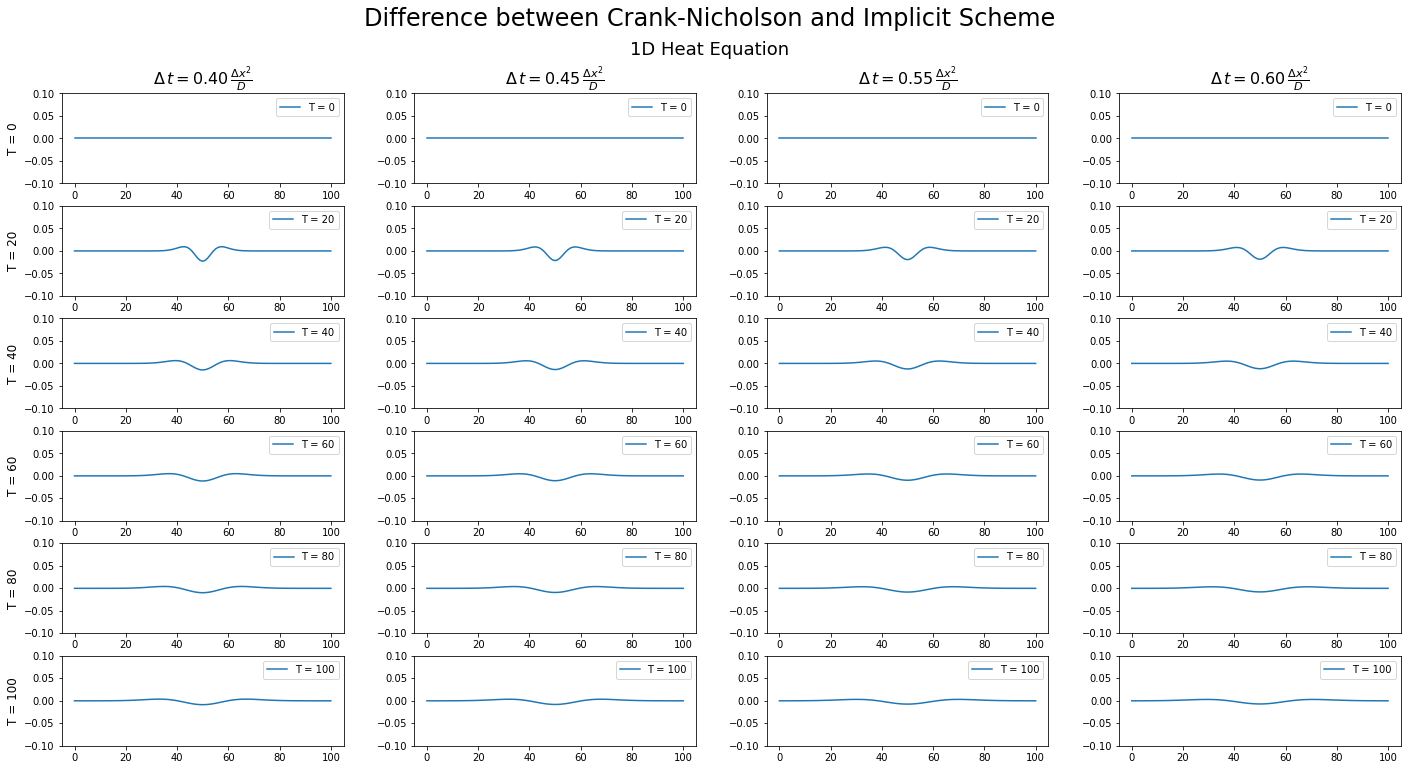

In [ ]:
rows, cols = 6, len(dt)
fig = plt.figure(figsize=(24,12))#, sharex=True, sharey=True)
spec = fig.add_gridspec(nrows=rows, ncols=cols, wspace=.25, hspace=.25)
plt.suptitle('Difference between Crank-Nicholson and Implicit Scheme', fontsize=24, x=.5)
fig.text(.5,.925,'1D Heat Equation', fontsize=18, ha='center')

for row in range(rows):
    for col in range(cols):
        ax = fig.add_subplot(spec[row,col])
        ax.plot(solution_space3[col,:,row*20]-solution_space2[col,:,row*20])
        plt.ylim(-0.1,0.1)
        plt.legend(['T = %d' % (row*20)])
        if col == 0:
            plt.ylabel('T = {}'.format(row*20), fontsize=12)
        if row == 0:
            ax.set_title(r'$\Delta \, t = %.2f \, \frac{\Delta x^2}{D}$' % (dt[col]), fontsize=16)

# for ax in fig.get_axes():
#     ax.label_outer()
plt.show()

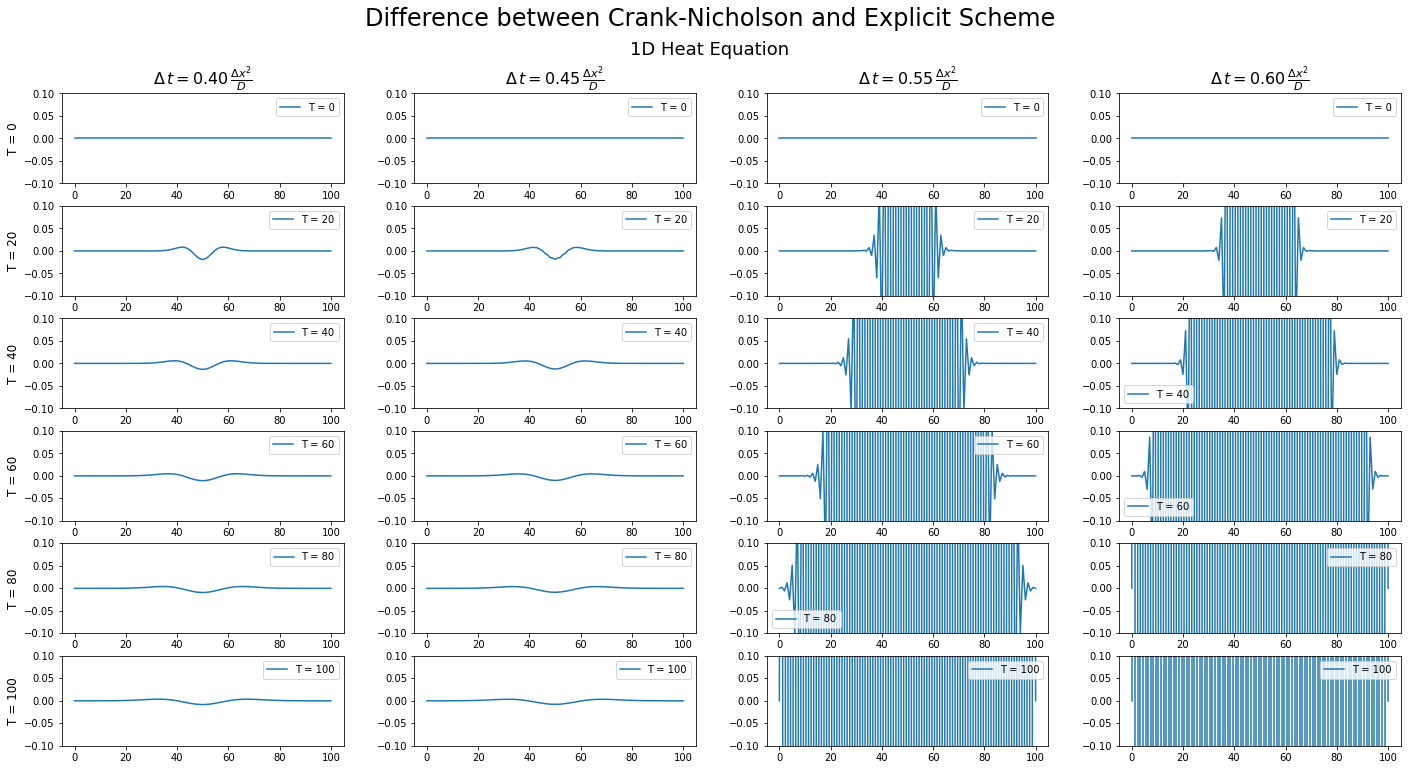

In [ ]:
rows, cols = 6, len(dt)
fig = plt.figure(figsize=(24,12))#, sharex=True, sharey=True)
spec = fig.add_gridspec(nrows=rows, ncols=cols, wspace=.25, hspace=.25)
plt.suptitle('Difference between Crank-Nicholson and Explicit Scheme', fontsize=24, x=.5)
fig.text(.5,.925,'1D Heat Equation', fontsize=18, ha='center')

for row in range(rows):
    for col in range(cols):
        ax = fig.add_subplot(spec[row,col])
        ax.plot(solution_space3[col,:,row*20]-solution_space[col,:,row*20])
        plt.ylim(-0.1,0.1)
        plt.legend(['T = %d' % (row*20)])
        if col == 0:
            plt.ylabel('T = {}'.format(row*20), fontsize=12)
        if row == 0:
            ax.set_title(r'$\Delta \, t = %.2f \, \frac{\Delta x^2}{D}$' % (dt[col]), fontsize=16)

# for ax in fig.get_axes():
#     ax.label_outer()
plt.show()